# Graph Lab

## Header information:

  - Author #1: Maged Armanios (armanm5@mcmaster.ca)
  - Author #2: Jinal Sanjula Kasturiarachchi (Katsurij@mcmaster.ca)
  - Gitlab URL: https://gitlab.cas.mcmaster.ca/sfwreng-3xb3-fall-22/l1-graph-lab
  - Avenue to Learn group name: Group 32

# Week 1: Manipulating

In week 1, we were tasked with designing an object oriented model for reading and storing data from CSV files. These files contained data regarding the London subway system. Specifically, one file contained information about the stations, one file contained information about the connections and another contained information about the lines.

In [1]:
import sys
from solution.graph import Graph, Node
from solution.metricsExtraction import MetricsExtractor
from solution.shortestPath import PathFactory
from solution.buildGraph import GraphBuilder
from matplotlib import pyplot as plt


In [2]:
pathToStations = "_dataset/london.stations.csv"
pathToConnections = "_dataset/london.connections.csv"

In [3]:
g = GraphBuilder.build(pathToStations,pathToConnections)


The class GraphBuilder containts the method buildGraph() with two parameters pertaining to the paths of the stations and connections files. This approach to building the graph enables us to add more methods to the class in the case that the CSV file format changes. This makes the graph class indepedant from the graph

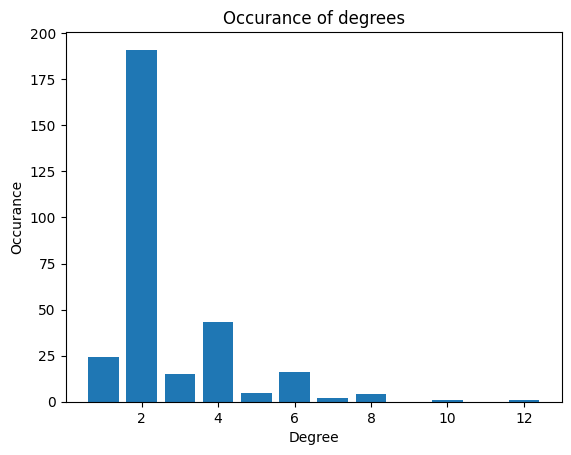

In [5]:
degrees = MetricsExtractor.compute_sum_of_degrees(g.graph)
plt.bar(*zip(*degrees.items()))
plt.title("Occurance of degrees")
plt.xlabel("Degree")
plt.ylabel("Occurance")
plt.show()

Metrics extractor computes different metrics about the graph using various functions. The graph above above shows the occurance of each degree in the graph. It is clear that on average, most stations connect to only two other stations.

In [6]:
print("Computed with djikstra's algorithm")
pathA = PathFactory.dijkstra(g,11,283)
pathA.printPath()
print("\nComputed with a* algorithm")
pathB = PathFactory.a_star(g,11,283)
pathB.printPath() 

Computed with djikstra's algorithm
Go from 11 to 193 in 6.0 stops using line 1
Go from 193 to 283 in 3.0 stops using line 6

Computed with a* algorithm
Go from 11 to 193 in 6.0 stops using line 1
Go from 193 to 283 in 3.0 stops using line 6


Going from station 11 (Baker Street) to 283 (Westbourne Park) can be done in a total of 9 stops and 2 lines

### Design Choices


### Explanation of Each Class
#### GraphBuilder
Seperating GraphBuilder from all other classes was key to ensuring the design is scalable. Now, the graph class is completely independant from the format of the CSV file and if the CSV file is to change we can simply add another method to GraphBuilder that can read it. In summary GraphBuilder enables Graph to be independant of the CSV files and can be adjusted in an open-closed manner.
#### Node
The Node class is what represents the subway stations. It containts all information with the exception of some columns about the zone and rail as they weren't used. Representing each station as an object does use more memory, but enables us to encapsulate the information easily and makes the data at each station easily accessable.
#### Graph
Graph uses nodes to represent the entire subway system in one class. It possess a graph attribute which contains a dictionary (Map) of every station. We used a map instead of an array so that we can accomodate any stationID. Graph also possess the ability to add stations (Nodes) and connections (vertices)
#### MetricsCalculator
MetricsCalculator seperates the functionality of pulling information from the graph from Graph. Each desired function is a public function that can be called as long as a graph is passed in. Additionally, it enables us to create more functions to compute metrics in an open-closed principle without overloading the GraphClass. 
#### PathFactory
PatchFactory is a class that contains all algorithms used for generating itineraries. As of now it contains a method for computing path using Djikstras and the A* algorithm. If any further functions were to be added to the library they can be appended to PathFactory without modifying any other algorithms. 
#### Itinerary
The itinerary class holds all relevant information about a path from one place to another. It is generated by the different methods of PathFactory. It can display the path from one station to another and removes redudant information like every stop on the line a user would take. 

### Benchmarking the Solution

#### Building The graph

#### Shortest Path (Djikstra)

#### Shortest Path (A*)

### Division of Work
#### Jinal
#### Maged
